<h3>Packages Required<h3>

In [ ]:
#import all the required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h2>Data Understanding<h2>
<h3>Data Loading<h3>

In [2]:
#load all the required files
train_data = pd.read_csv("data/train.csv")
# print(train_data.head())
test_data = pd.read_csv("data/test.csv")
# print(test_data.head())

df = train_data

<h3>Avg Sales Yearly Trend<h3>

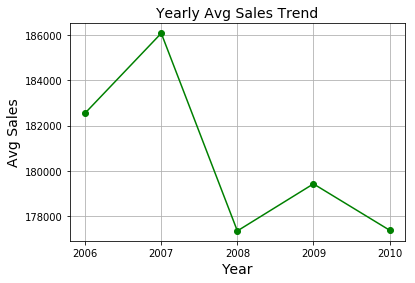

In [3]:
#start analysing the data
# 1. According to the data what is the Yearly sales trend
df_yearly = pd.pivot_table(
    df, 
    values="SalePrice",
    index="YrSold",
    aggfunc=np.mean
)


plt.plot(df_yearly.index,df_yearly["SalePrice"],color='green', marker='o')
plt.title('Yearly Avg Sales Trend', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.xticks(np.arange(2006, 2011, step=1))
plt.ylabel('Avg Sales', fontsize=14)
plt.grid(True)


<h3>Fireplace Analysis<h3>
<h4>Impact of fireplace on SalePrice<h4>

In [4]:
# 2.a How does presence of a fireplace impact sales price
df_fp = pd.pivot_table( df,
                        values = "SalePrice",
                        index = "Fireplaces",
                        aggfunc = np.mean)
df_fp

plt.bar(df_fp.index,df_fp["SalePrice"])
plt.title("Avg SalePrice by Fireplaces")
plt.xlabel("Count of Fireplaces")
plt.ylabel("Avg SalePrice")
plt.xticks(np.arange(0, 4, step=1))

,SalePrice
Fireplaces,
0,141331.482609
1,211843.909231
2,240588.539130
3,252000.000000


<h4>Impact of fireplace and number of rooms on SalePrice<h4>

AxesSubplot(0.125,0.125;0.62x0.755)


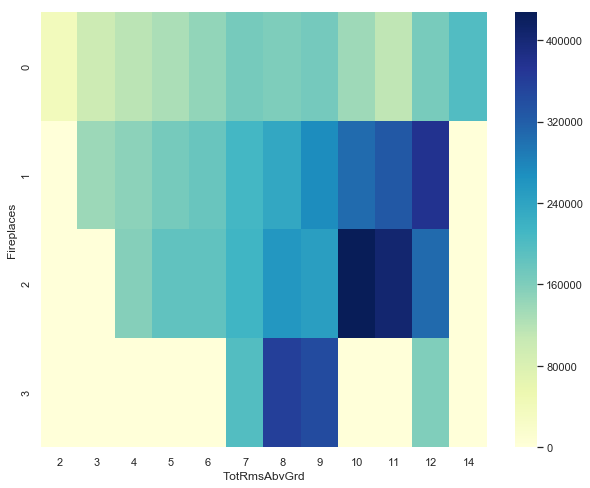

In [10]:
# 2.b How number of rooms and fireplace tell us about the Impact of Sales
df_fp_rm = pd.pivot_table( df,
                        values = "SalePrice",
                        columns = "TotRmsAbvGrd",
                        index = "Fireplaces",
                        aggfunc = np.mean,
                        fill_value = 0
                      )
df_fp_rm.head()
sns.set(rc = {'figure.figsize':(10,8)})
print(sns.heatmap(df_fp_rm,cmap="YlGnBu"))

<h4>Further analysis of impact of fireplace and number of rooms on SalePrice<h4>

AxesSubplot(0.125,0.125;0.62x0.755)


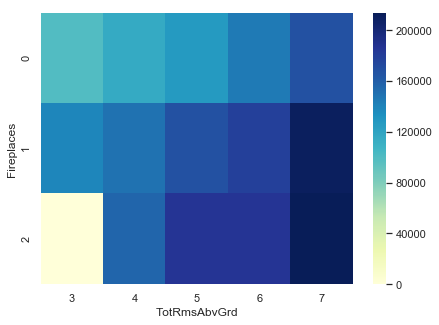

In [11]:
df_fp_rm.loc[0:2,[3,4,5,6,7]]
sns.set(rc = {'figure.figsize':(7,5)})
print(sns.heatmap(df_fp_rm.loc[0:2,[3,4,5,6,7]],cmap="YlGnBu"))

<h3>SalePrice analysis vs GarageTypes<h3>

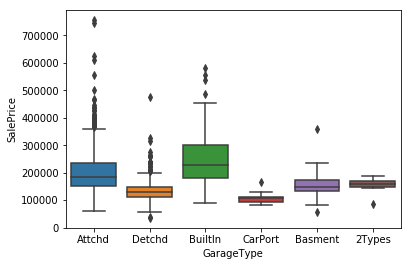

In [123]:
# 3. How is the SalePrice distributed across different Garage tpes
df_garage = pd.concat([df['SalePrice'], df["GarageType"]], axis=1)
sns.boxplot(x="GarageType", y="SalePrice", data=df_garage)

<h3>Numerical Analysis<h3>

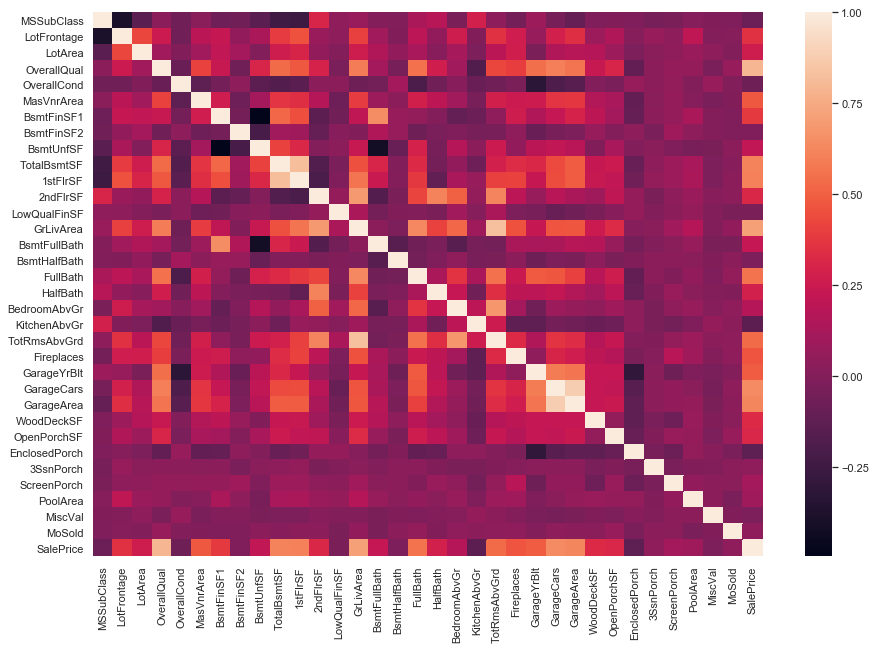

In [170]:
# 4. Perform numerical analysis
df_num = df.select_dtypes(include=['int64','float64'])
df_num.head() #Year fields and Id should also be removed
df_num_final = df_num.loc[:,~df_num.columns.isin(["Id","YrSold","YearBuilt","YearRemodAdd"])]
corr_mat = df_num_final.corr()
# print(corr_mat)
sns.set(rc = {'figure.figsize':(15,10)})
sns.heatmap(corr_mat)
# corr_mat

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33],
 <a list of 34 Text xticklabel objects>)

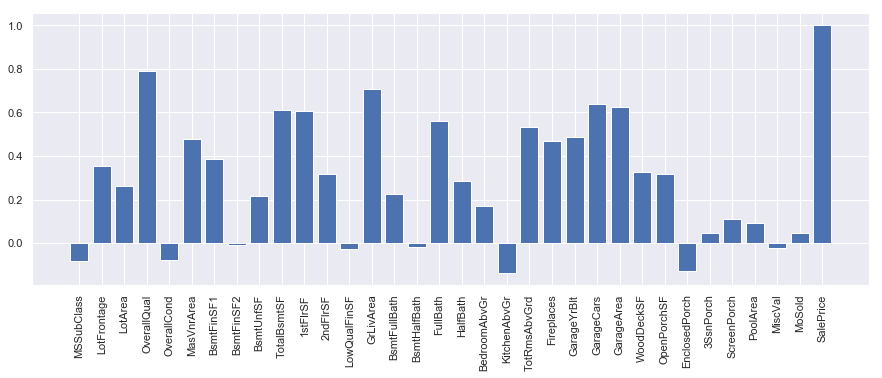

In [171]:
plt.figure(figsize=(15, 5))
plt.bar(corr_mat.index,corr_mat['SalePrice'])
plt.xticks(rotation=90)
# sns.heatmap(corr_mat)